BFS: Rute terpendek dari A ke H:
Rute: ['A', 'B', 'D', 'F', 'H']

DFS: Semua rute dari A ke H:
['A', 'B', 'D', 'C', 'E', 'G', 'H']
['A', 'B', 'D', 'F', 'H']
['A', 'C', 'D', 'F', 'H']
['A', 'C', 'E', 'G', 'H']


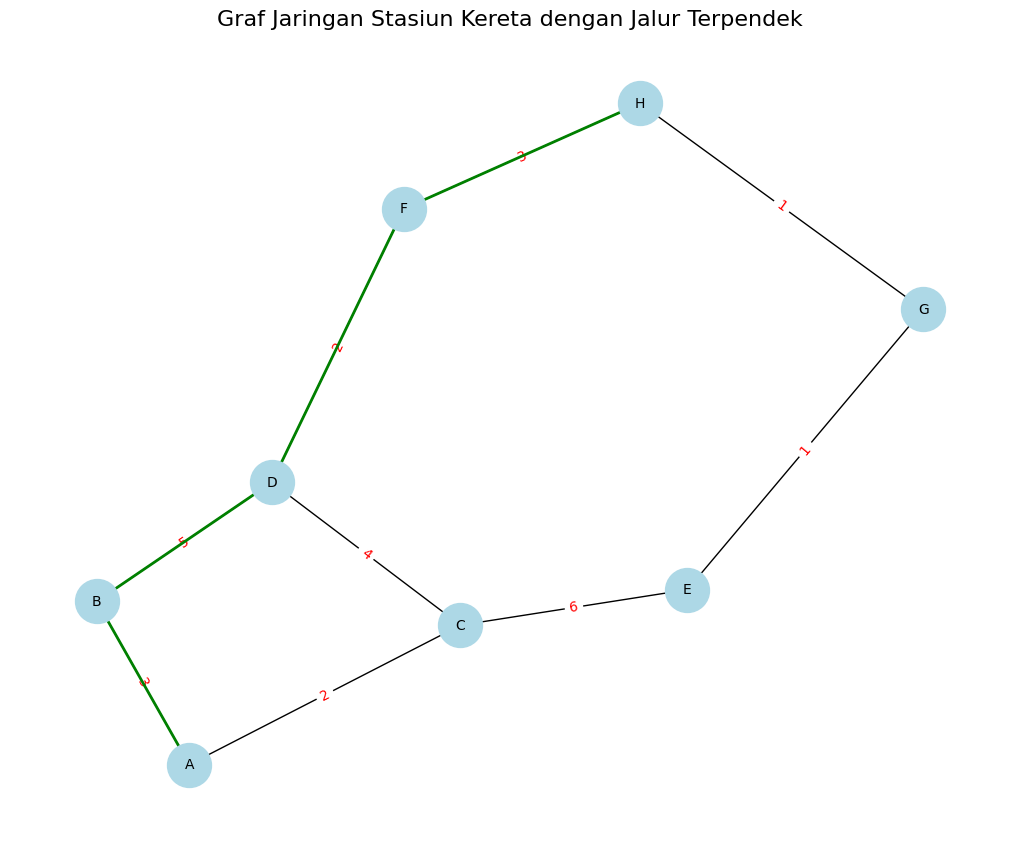

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

# Kelas untuk merepresentasikan graf
class Graph:
    def __init__(self):
        self.graph = {}
        self.distances = {}

    # Fungsi Menambahkan edge dan jaraknya
    def add_edge(self, u, v, distance):
        if u not in self.graph:
            self.graph[u] = []
        if v not in self.graph:
            self.graph[v] = []
        self.graph[u].append(v)
        self.graph[v].append(u)
        self.distances[(u, v)] = distance
        self.distances[(v, u)] = distance

    # BFS
    def bfs_shortest_path(self, start, goal):
        queue = [[start]]
        visited = []

        while queue:
            path = queue.pop(0)
            node = path[-1]
            if node in visited:
                continue
            if node == goal:
                return path
            visited.append(node)

            for neighbor in self.graph.get(node, []):
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)

        return None

    # DFS
    def dfs_all_paths(self, start, goal, path=None, all_paths=None):
        if path is None:
            path = []
        if all_paths is None:
            all_paths = []

        path.append(start)

        if start == goal:
            all_paths.append(list(path))
        else:
            for neighbor in self.graph.get(start, []):
                if neighbor not in path:
                    self.dfs_all_paths(neighbor, goal, path, all_paths)

        path.pop()
        return all_paths

g = Graph()
edges = [
    ("A", "B", 3),
    ("A", "C", 2),
    ("B", "D", 5),
    ("C", "D", 4),
    ("C", "E", 6),
    ("D", "F", 2),
    ("E", "G", 1),
    ("F", "H", 3),
    ("G", "H", 1)
]

for u, v, weight in edges:
    g.add_edge(u, v, weight)

print("BFS: Rute terpendek dari A ke H:")
shortest_path = g.bfs_shortest_path("A", "H")
print("Rute:", shortest_path)

print("\nDFS: Semua rute dari A ke H:")
all_paths = g.dfs_all_paths("A", "H")

for path in all_paths:
    print(path)

#Visualisasi Graf
G = nx.Graph()

for u, v, weight in edges:
    G.add_edge(u, v, weight=weight)

pos = nx.spring_layout(G)

plt.figure(figsize=(10, 8))

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=10)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')

if shortest_path:
    edge_list = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=edge_list, edge_color='green', width=2)

plt.title("Graf Jaringan Stasiun Kereta dengan Jalur Terpendek", fontsize=16)
plt.show()